In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ISMAIL\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv(r"C:\Users\ISMAIL\Downloads\census_07_2022.csv")

In [3]:
df.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN
3,3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   object
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   object
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 5960 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       5910 non-null   object
dtypes: object(11)
memory usage: 668.1+ KB


In [6]:
df.describe()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,7773,7773,7773,7773,7773,7773,5960,7773,7773,7773,5910
unique,222,105,366,630,110,21,9,9,1086,8,14
top,1,Wong Light,James,Smith,43,Head,Single,Female,Student,None,None
freq,301,701,36,225,146,2912,2660,3889,1477,7721,2594


In [7]:
df.isnull().any()

House Number                     False
Street                           False
First Name                       False
Surname                          False
Age                              False
Relationship to Head of House    False
Marital Status                    True
Gender                           False
Occupation                       False
Infirmity                        False
Religion                          True
dtype: bool

In [8]:
print(df['Marital Status'].isnull().sum())

1813


In [9]:
print(df['Religion'].isnull().sum())

1863


In [10]:
df['Address'] = df['House Number'] + ',' + df['Street']

In [11]:
df['Age'] = df['Age'].astype(int)

ValueError: invalid literal for int() with base 10: '72.38784457'

In [ ]:
def categorize_occupation (Occupations):
    word = Occupations.split()
    if len(word) > 0:
        first_word = word[0]
        if first_word == 'Unemployed':
            return 0 #'Unemployed'
        elif first_word == 'Student':
            return 1#'Student'
        elif first_word == 'Child':
            return 2#'Child'
        elif first_word == 'Retired':
            return 3#'Retired'
    
    return 4#'Employed'
    
df['Occupation Category'] = df['Occupation']. apply(categorize_occupation)
category_labels = {0.0:'Unemployed', 1.0:'Student', 2.0:'Child', 3.0:'Retired', 4.0:'Employed'}
df['Occupation Category'] = df['Occupation Category'].map(category_labels)
df.head()

In [12]:
#creating a mask for non numeric values in Age column
mask = df['Age'].str.contains(r'\D')

#selecting the rows containing non-numeric characters
non_numeric_rows = df[mask]

print(non_numeric_rows)

     House Number         Street First Name Surname          Age  \
358            80    Fish Harbor       Mary    Ward  72.38784457   
359            80    Fish Harbor       Alex    Ward  74.38784457   
5060            5    Kerr Avenue      Lewis  Turner  80.57582061   
5061            5    Kerr Avenue     Kirsty  Turner  77.57582061   
5062            5    Kerr Avenue      Jodie   Dixon     7.11E-15   
5998           40  Skylock Curve      Jodie  Clarke                

     Relationship to Head of House Marital Status  Gender  \
358                           Head        Married  Female   
359                        Husband        Married    Male   
5060                          Head        Married    Male   
5061                          Wife        Married  Female   
5062                 Granddaughter            NaN  Female   
5998                      Daughter            NaN  Female   

                      Occupation Infirmity   Religion           Address  
358          Retired 

In [13]:
df.drop([358,359,5060,5061,5062,5998], inplace = True)

In [14]:
df['Age'] = df['Age'].astype(int)

In [15]:
df.replace({'Marital Status':{'W':'Widowed', 'M' : 'Married', 'S': 'Single', 'D':'Divorced', ' ':'Divorced'}}, inplace = True)
df.rename(columns = {'Marital Status':'Marital_Status'}, inplace = True)
df.rename(columns = {'Relationship to Head of House':'Relationship_to_HOH'}, inplace = True)

In [16]:
df['Marital_Status'].nunique()

4

In [17]:
df['Marital_Status'].value_counts()

Single      2661
Married     2192
Divorced     703
Widowed      400
Name: Marital_Status, dtype: int64

In [18]:
df['Religion'].value_counts()

None         2593
Christian    1810
Catholic      805
Methodist     491
Muslim        100
Sikh           60
Jewish         36
                3
Bahai           2
Private         2
Buddist         1
Sith            1
Baptist         1
Orthodoxy       1
Name: Religion, dtype: int64

In [19]:
df['Relationship_to_HOH'].value_counts()

Head                     2910
Son                      1273
Daughter                 1214
Husband                   802
None                      474
Wife                      290
Lodger                    274
Partner                   223
Grandson                   66
Granddaughter              55
Sibling                    42
Cousin                     32
Visitor                    27
Step-Son                   24
Adopted Son                17
Step-Daughter              16
Neice                      10
Nephew                      9
Adopted Daughter            7
Adopted Granddaughter       1
                            1
Name: Relationship_to_HOH, dtype: int64

In [20]:
##df['Marital_Status_map'] = df.Marital_Status.map({'Widowed':0, 'Married':1, 'Single':2, 'Divorced':3 })
#df['Relationship_to_HOH_Map'] = df.Relationship_to_HOH.map({'Head':0, 'Son':1, 'Daughter':2, 'Husband':3, 'None':4, 'Wife':5, 'Lodger':6, 'Partner':7, 'Grandson':8, 'Granddaughter':9, 'Sibling':10, 'Cousin':11, 'Visitor':12, 'Step-Son':13, 'Adopted Son':14, 'Step-Daughter':15, 'Neice':16, 'Nephew':17, 'Adopted Daughter':18, 'Adopted Granddaughter':19})
##df[['Relationship_to_HOH_Map', 'Marital_Status_map']]

In [21]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship_to_HOH,Marital_Status,Gender,Occupation,Infirmity,Religion,Address
0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian,"1,Forgotten Gardens"
1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian,"1,Forgotten Gardens"
2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN,"1,Forgotten Gardens"
3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian,"2,Forgotten Gardens"
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN,"2,Forgotten Gardens"


In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

#check for missing values
print(df.isnull().sum())

#drop rows with missing values
df.dropna(inplace=True)

# Instatiate LabelEncoder and fit_transform on the categorical columns
le_MS = LabelEncoder()
df['Marital_Status'] = le_MS.fit_transform(df['Marital_Status'])
le_R = LabelEncoder()
df['Religion'] = le_R.fit_transform(df['Religion'])

# Instantiate  KNNImputer and fit_tansform on the numerical columns
imputer = KNNImputer(n_neighbors=3)
df[['Marital_Status', 'Religion']] =imputer.fit_transform(df[['Marital_Status', 'Religion']])

#invers transform to original categorical columns
df['Marital_Status'] = le_MS.inverse_transform(df['Marital_Status'].astype(int))
df['Religion'] = le_R.inverse_transform(df['Religion'].astype(int))

House Number              0
Street                    0
First Name                0
Surname                   0
Age                       0
Relationship_to_HOH       0
Marital_Status         1811
Gender                    0
Occupation                0
Infirmity                 0
Religion               1861
Occupation Category       0
dtype: int64


In [31]:
print('There is an average of ' +  str(df['Address'].value_counts().mean().round(0)) +  ' occupants per house')

There is an average of 3.0 occupants per house


In [34]:
df['Address'].value_counts().median() 

2.0

In [48]:
df.isnull().any()

House Number           False
Street                 False
First Name             False
Surname                False
Age                    False
Relationship_to_HOH    False
Marital_Status         False
Gender                 False
Occupation             False
Infirmity              False
Religion               False
Occupation Category    False
dtype: bool

In [49]:
df['Marital_Status'].value_counts()

Single      2634
Married     2177
Divorced     694
Widowed      400
Name: Marital_Status, dtype: int64

In [50]:
print(df['Marital_Status'].isnull().sum())

0


In [51]:
#Since it is just the Religion column that has null values left and majority of the people have None for their religion and most of the other religions apart from 
#Christian, Catholic and Methodist have above a hundred in terms of volume, the rest are quite insignificant so we will be filling in the null values with None
df['Religion'] = df['Religion'].fillna(value = "None") 

In [52]:
df['Occupation'].nunique()

1083

In [53]:
df['Infirmity'].unique()

array(['None', 'Unknown Infection', 'Blind', 'Disabled', ' ',
       'Mental Disability', 'Physical Disability', 'Deaf'], dtype=object)

In [54]:
df.replace({'Infirmity':{' ':'None'}}, inplace = True)

In [55]:
df['Infirmity'].unique()

array(['None', 'Unknown Infection', 'Blind', 'Disabled',
       'Mental Disability', 'Physical Disability', 'Deaf'], dtype=object)

In [71]:
#This is to create a new age group column based on different age ranges
df.loc[df['Age']<11, 'Age group'] = 'Youngins'
df.loc[df['Age'].between(11,26), 'Age group'] = 'Gen Z'
df.loc[df['Age'].between(27,42), 'Age group'] = 'Millennials'
df.loc[df['Age'].between(43,58), 'Age group'] = 'Gen X'
df.loc[df['Age']>58, 'Age group'] = 'Boomers ii'

In [72]:
df['Gender'].value_counts()

Female    3153
Male      2752
Name: Gender, dtype: int64

In [73]:
df.replace({'Gender':{'M':'Male', 'm' : 'Male', 'male': 'Male', 'F':'Female', 'f':'Female', 'female':'Female', ' ':'Female'}}, inplace = True)

# DEMOGRAPHIC ANALYSIS
### Thh is Analysis is on the demographic elements of the census, it includes analysis and visualisations on Age Group, Age, Gender distribution, occupation, Marital status, Religion density

<AxesSubplot:xlabel='Age group', ylabel='count'>

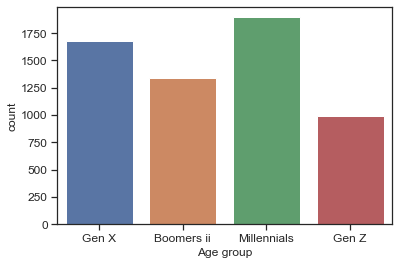

In [75]:
sns.countplot(data=df,x='Age group' )

Text(0.5, 1.0, 'Proportion of Age Group')

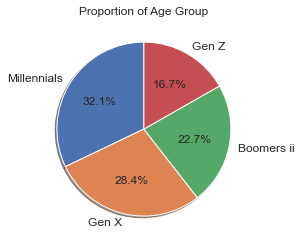

In [89]:
#Calculate the amount of each age group
Age_group_counts = df['Age group'].value_counts()
plt.pie(Age_group_counts, labels = Age_group_counts.index, autopct = '%1.1f%%', startangle=90, shadow = True)
#Add title
plt.title('Proportion of Age Group')


### From the bar chart and pie chart , it is evident that the Millenials have the highest population which is the age range from 27-42

Text(0.5, 1.0, 'Proportion of Male and Female')

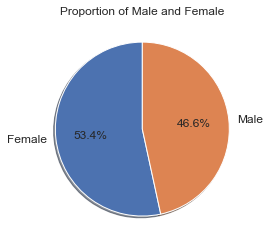

In [76]:
#Calculate the amount of males and females
Gender_counts = df['Gender'].value_counts()
plt.pie(Gender_counts, labels = Gender_counts.index, autopct = '%1.1f%%', startangle=90, shadow = True)
#Add title
plt.title('Proportion of Male and Female')


### Based on the pie chart, it shows that females are more than male individuals but the difference between the both sexes is not much


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

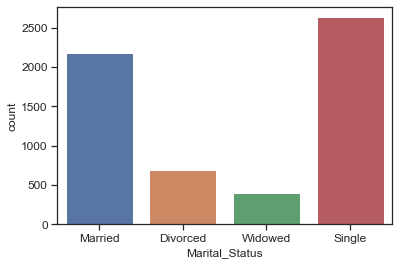

In [77]:
sns.countplot(data=df,x='Marital_Status' )

### The population mostly consists of single people followed by married people and the widowed have the least population.

[Text(0, 0, 'Christian'),
 Text(1, 0, 'None'),
 Text(2, 0, 'Catholic'),
 Text(3, 0, 'Methodist'),
 Text(4, 0, 'Muslim'),
 Text(5, 0, 'Jewish'),
 Text(6, 0, 'Sikh'),
 Text(7, 0, 'Buddist'),
 Text(8, 0, 'Bahai'),
 Text(9, 0, 'Sith'),
 Text(10, 0, 'Private'),
 Text(11, 0, 'Baptist'),
 Text(12, 0, ' '),
 Text(13, 0, 'Orthodoxy')]

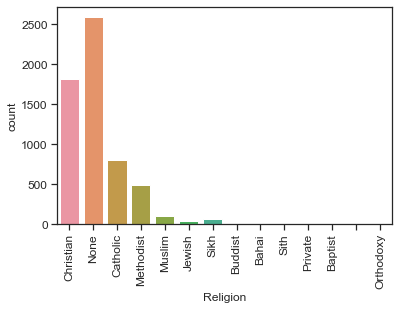

In [78]:
sns.set(style='ticks', rc = {'xtick.labelsize': 12, 'ytick.labelsize': 12})
ax = sns.countplot(data=df,x='Religion' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)



### Individuals with that filled in None as religion have the highest population with a count of slightly above 2500 and the next three in descending order is Christian with a count of almost 2000 followed by the catholics who have a count  of 500 plus but less than 1000, then finally the methodist with a count of 500. The ramining religions have a really insignificant number in comparison to the total population.


In [79]:
df['Age'] = df['Age'].astype(float)

In [80]:
pd.to_numeric(df['Age'], errors='raise')

0       56.0
1       57.0
3       44.0
5       72.0
6       38.0
        ... 
7765    43.0
7768    30.0
7770    54.0
7771    48.0
7772    34.0
Name: Age, Length: 5905, dtype: float64

In [81]:
df['Street'].nunique()

105

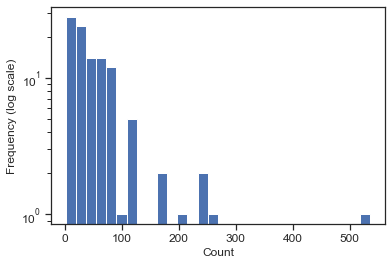

In [82]:
#Grouping the data by address and count the occurences of each address
Street_counts = df.groupby('Street').size().reset_index(name='count')
#creat a histogram of address counts
plt.hist(Street_counts['count'], bins=30, log=True)

plt.xlabel('Count')
plt.ylabel('Frequency (log scale)')
plt.show()

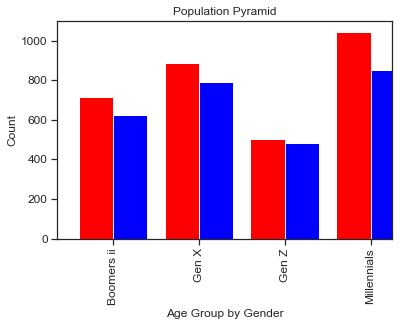

In [83]:
#Group data by age group and gender
grouped_data = df.groupby(['Age group', 'Gender'])['Age'].count()
grouped_data = grouped_data.unstack()

fig, ax = plt.subplots()
grouped_data ['Male'].plot(kind='bar', position=0, width=0.4, ax=ax,  color ='blue')
grouped_data ['Female'].plot(kind='bar', position=1, width=0.4, ax=ax,  color ='red')

ax.set_xlabel('Age Group by Gender')
ax.set_ylabel('Count')
ax.set_title('Population Pyramid')

plt.show()

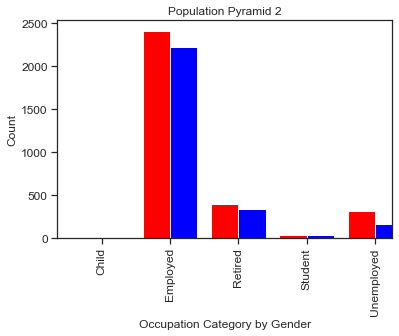

In [84]:
#Group data by Occupation category and gender
grouped_data = df.groupby(['Occupation Category', 'Gender'])['Occupation Category'].count()
grouped_data = grouped_data.unstack()

fig, ax = plt.subplots()
grouped_data ['Male'].plot(kind='bar', position=0, width=0.4, ax=ax,  color ='blue')
grouped_data ['Female'].plot(kind='bar', position=1, width=0.4, ax=ax,  color ='red')

ax.set_xlabel('Occupation Category by Gender')
ax.set_ylabel('Count')
ax.set_title('Population Pyramid 2')

plt.show()

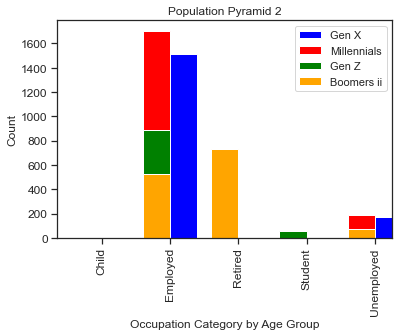

In [86]:
#Group data by Occupation category and Age group
grouped_data = df.groupby(['Occupation Category', 'Age group'])['Occupation Category'].count()
grouped_data = grouped_data.unstack()

fig, ax = plt.subplots()
grouped_data ['Gen X'].plot(kind='bar', position=0, width=0.4, ax=ax,  color ='blue')
grouped_data ['Millennials'].plot(kind='bar', position=1, width=0.4, ax=ax,  color ='red')
grouped_data ['Gen Z'].plot(kind='bar', position=1, width=0.4, ax=ax,  color ='green')
grouped_data ['Boomers ii'].plot(kind='bar', position=1, width=0.4, ax=ax,  color ='orange')

ax.set_xlabel('Occupation Category by Age Group')
ax.set_ylabel('Count')
ax.set_title('Population Pyramid 2')
ax.legend()

plt.show()